In [2]:
import numpy as np
import pandas as pd

In [7]:
dataset=pd.read_csv('clean_datav2.csv')

In [3]:
dataset.head()

,Date,Time,S&P,Dow_Jones,NASDAQ,Skype（Microsoft）,Cisco,Facebook,Trading_Volume,Prev_Avg_Price,True_Price
0,2019/04/18,2019/04/18 11:30,2897.48,26503.69,7972.08,120.46,54.51,177.82,6786527,65.00,62.55
1,2019/04/18,2019/04/18 12:30,2904.74,26564.22,7993.30,120.80,54.66,178.05,3991540,62.55,64.87
2,2019/04/18,2019/04/18 13:30,2905.30,26570.32,7990.27,121.29,54.65,178.36,1504239,64.75,63.15
3,2019/04/18,2019/04/18 14:30,2906.31,26585.46,7997.15,121.60,54.64,178.35,1098866,63.15,63.11
4,2019/04/18,2019/04/18 15:30,2906.38,26586.35,7995.29,121.68,54.65,178.18,913495,63.11,63.07


In [4]:
dataset.shape

(1708, 11)

In [6]:
dataset['Date_f']=pd.to_datetime(dataset['Date'])

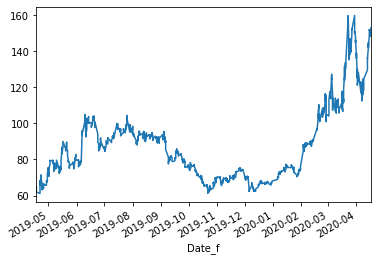

In [8]:
dataset.set_index(['Date_f'])['True_Price'].plot(kind = 'line')

[]

/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


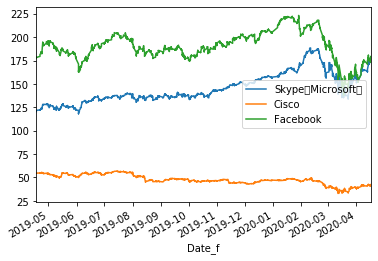

In [13]:
dataset.plot(x='Date_f',y=['Skype（Microsoft）','Cisco','Facebook']).plot(kind = 'line')

[]

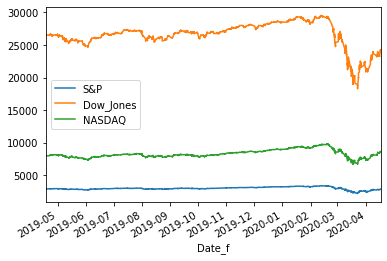

In [14]:
dataset.plot(x='Date_f',y=['S&P','Dow_Jones','NASDAQ']).plot(kind = 'line')

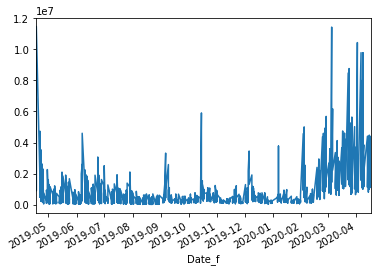

In [12]:
dataset.set_index(['Date_f'])['Trading_Volume'].plot(kind = 'line')

In [17]:
# 'Moving Average - MA'
# A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    dataset[column_name]=pd.DataFrame.rolling(dataset['True_Price'],ma).mean()

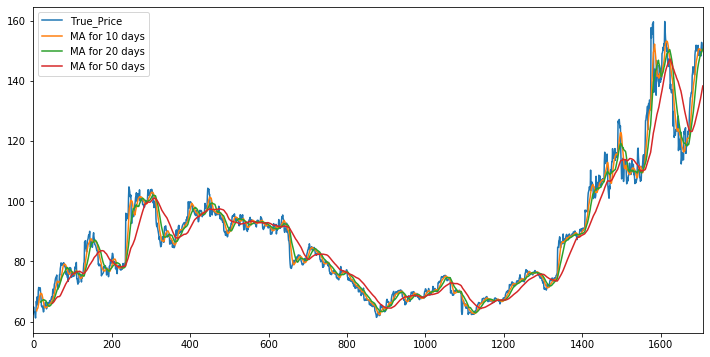

In [19]:
dataset[['True_Price','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))

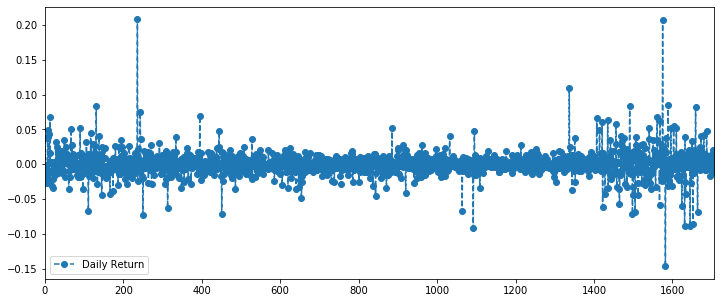

In [21]:
# Daily Return Analysis¶-Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.
# use pct_change to find the percent change for each day
dataset['Daily Return'] = dataset['True_Price'].pct_change()
# plot the daily return percentage
dataset['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')

In [23]:

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

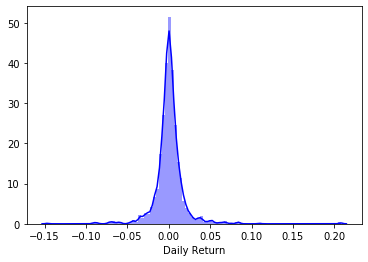

In [25]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(dataset['Daily Return'].dropna(),bins=100,color='blue')

In [40]:
closing_df1 = pd.DataFrame(dataset['Facebook'])
close1  = closing_df1.rename(columns={"Facebook": "Facebook"})

closing_df2 = pd.DataFrame(dataset['Cisco'])
close2  = closing_df2.rename(columns={"Cisco": "Cisco"})
closing_df = pd.concat([close1, close2], axis=1)
closing_df.head()

,Facebook,Cisco
0,177.82,54.51
1,178.05,54.66
2,178.36,54.65
3,178.35,54.64
4,178.18,54.65


In [41]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

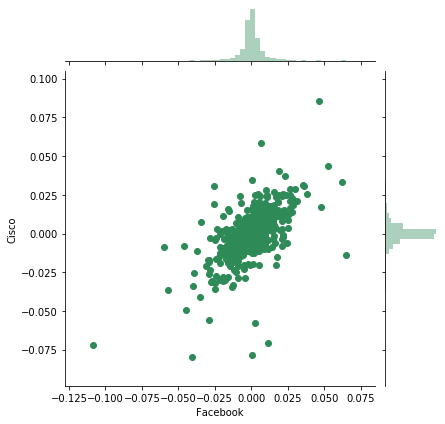

In [43]:
# Comparing Zoom and Facebook should show a perfectly linear relationship
sns.jointplot('Facebook','Cisco',tech_returns,kind='scatter',color='seagreen')

In [44]:
closing_df1 = pd.DataFrame(dataset['True_Price'])
close1  = closing_df1.rename(columns={"True_Price": "True_Price"})

closing_df2 = pd.DataFrame(dataset['Cisco'])
close2  = closing_df2.rename(columns={"Cisco": "Cisco"})
closing_df3 = pd.DataFrame(dataset['Facebook'])
close1  = closing_df1.rename(columns={"Facebook": "Facebook"})
closing_df = pd.concat([close1, close2], axis=1)
closing_df.head()

,True_Price,Cisco
0,62.55,54.51
1,64.87,54.66
2,63.15,54.65
3,63.11,54.64
4,63.07,54.65


In [45]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

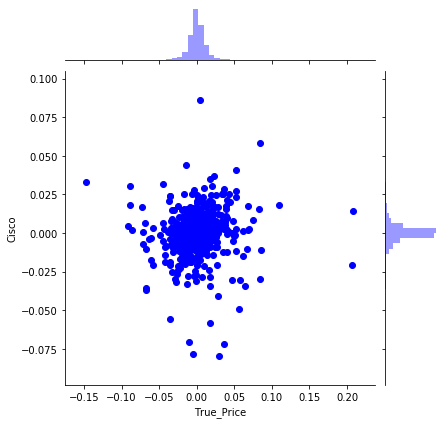

In [48]:
# Comparing Zoom and Facebook should show a perfectly linear relationship
sns.jointplot('True_Price','Cisco',tech_returns,kind='scatter',color='blue')

In [53]:
closing_df1 = pd.DataFrame(dataset['True_Price'])
close1  = closing_df1.rename(columns={"True_Price": "True_Price"})

closing_df2 = pd.DataFrame(dataset['Dow_Jones'])
close2  = closing_df2.rename(columns={"Dow_Jones": "Dow_Jones"})
closing_df = pd.concat([close1, close2], axis=1)
closing_df.head()

,True_Price,Dow_Jones
0,62.55,26503.69
1,64.87,26564.22
2,63.15,26570.32
3,63.11,26585.46
4,63.07,26586.35


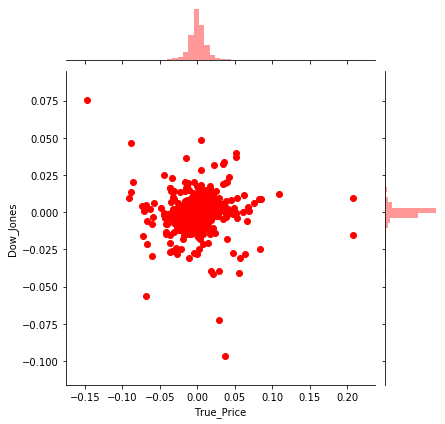

In [56]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()
# Comparing Zoom and Facebook should show a perfectly linear relationship
sns.jointplot('True_Price','Dow_Jones',tech_returns,kind='scatter',color='red')

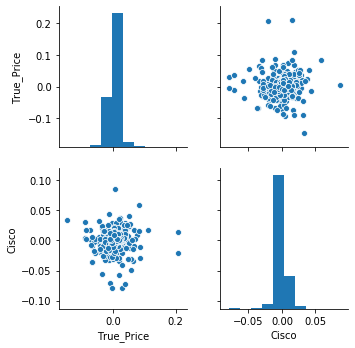

In [49]:
sns.pairplot(tech_returns.dropna())

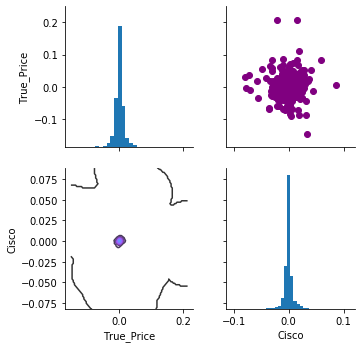

In [50]:
import warnings
warnings.filterwarnings('ignore')
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


plt.show()

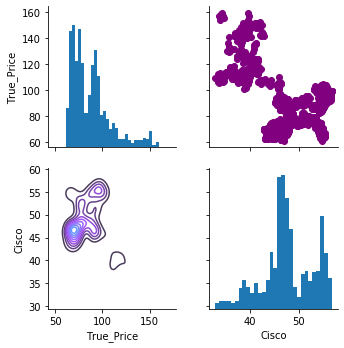

In [51]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

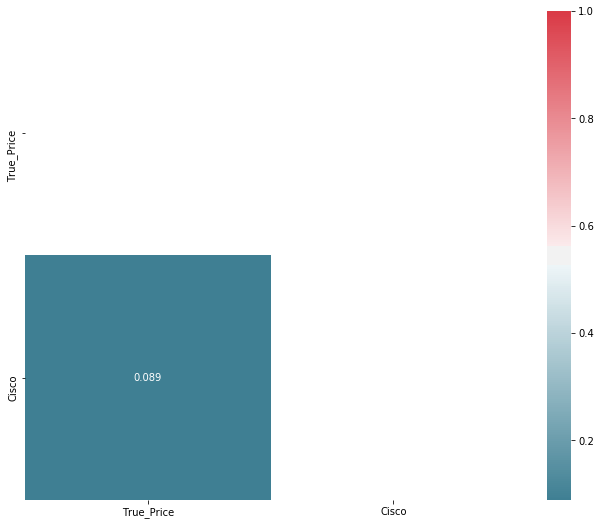

In [52]:
# use sebron for a quick correlation plot for the daily returns

# Compute the correlation matrix
corr = tech_returns.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

In [66]:
pip install pandas_datareader

     |████████████████████████████████| 107 kB 53 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#to get rid of import error of pandas_datareader 
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
# For time stamps
from datetime import datetime

In [18]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [17]:
# Get start price(stock open price) from GOOG.head()
start_price = 62.55
days = 365
deltaT = 1/days
mu = dataset.mean()['True_Price']
sigma = dataset.std()['True_Price']

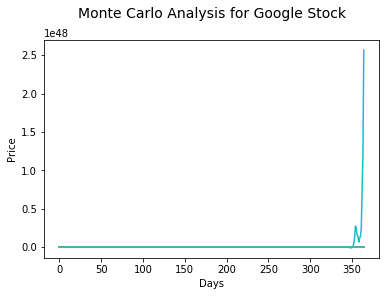

In [27]:
# Get start price(stock open price) from GOOG.head()
start_price = 62.55

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis', fontsize = 14)
plt.show()